# PCA For data analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris.drop('species', axis=1)
y = iris['species']

**PCA is sensitive to scale because it is counting for difference in variance of features, therefore we need to rescale our features**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X = scaler.fit_transform(X)

In [8]:
scaled_df = pd.DataFrame(X, columns=iris.columns[:-1])

In [9]:
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [13]:
principalComponents = pca.fit_transform(X)

In [14]:
pca_df = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

In [15]:
pca_df.head()

,Principal Component 1,Principal Component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [16]:
pca_df['species'] = iris['species']

In [17]:
pca_df.head()

,Principal Component 1,Principal Component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


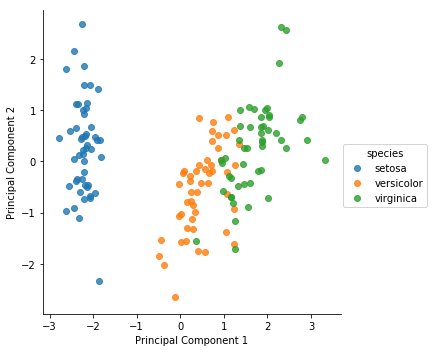

In [21]:
sns.lmplot(x='Principal Component 1', y="Principal Component 2", data=pca_df,
           hue='species',fit_reg=False)

These two components explained ~0.95 of the variance in the data.

This means the graph above is projection of 4 dimensions onto 2 dimensions in such a way that 95% of variance is preserved.

In [23]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])